In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

### 범례
**범례는 axes에서 부르는것이고 label은 각 line 객체에 속성이다**

- 미리 그릴때 label을 지정
- 나중에 line에다가 label추가
- 혹은 축에서 legend([line],[label]) 식으로
- 라벨 갯수 신경 쓸 필요 없으면 legend([label]) 도 가능

범례 순서도 지정 가능

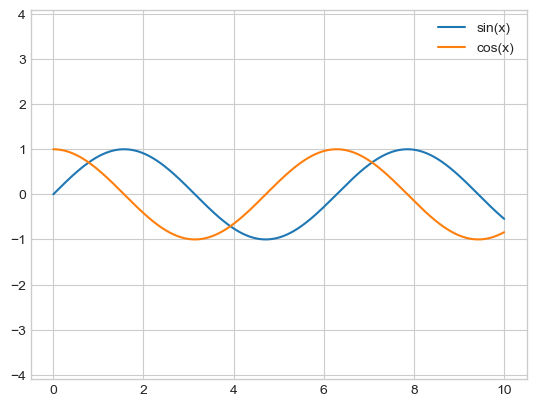

In [2]:
# 간단하게 범례 만들기
x = np.linspace(0,10,1000)
fig,ax = plt.subplots()
ax.plot(x,np.sin(x),label='sin(x)')
ax.plot(x,np.cos(x),label='cos(x)')
ax.axis('equal')
lg = ax.legend()

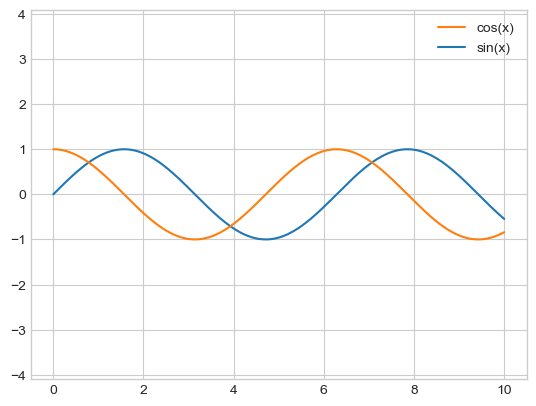

In [6]:
x = np.linspace(0,10,1000)
fig,ax = plt.subplots()
line1, = ax.plot(x,np.sin(x),label='sin(x)')
line2, = ax.plot(x,np.cos(x),label='cos(x)')
ax.axis('equal')
lg = ax.legend(handles=[line2,line1]) # 범례 순서를 한번 봐라

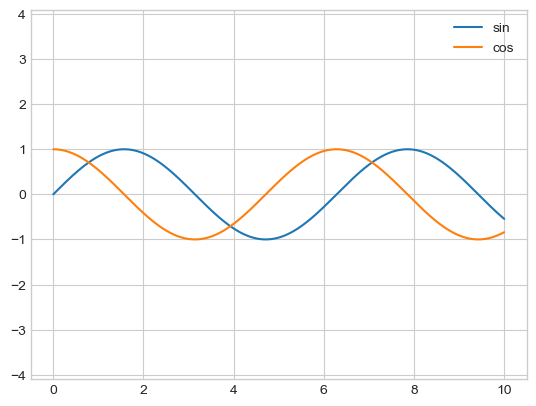

In [11]:
# 그리는 순서를 알고있기 때문에
# 그냥 바로 label이름 집어넣어도 된다
x = np.linspace(0,10,1000)
fig,ax = plt.subplots()
line1, = ax.plot(x,np.sin(x))
line2, = ax.plot(x,np.cos(x))
ax.axis('equal')
lg = ax.legend(['sin','cos']) 

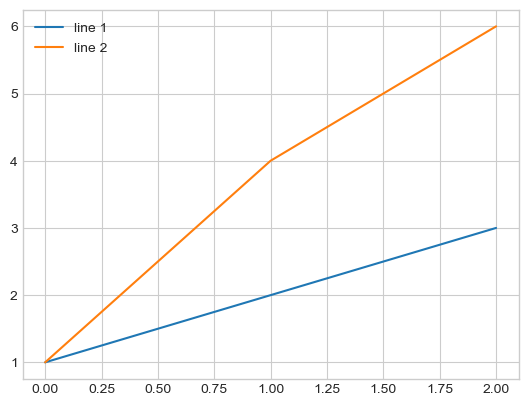

In [4]:
# 위와 동일한 방식이다 => 근데 솔직히 좀 불편하다
fig,ax = fig,ax = plt.subplots()
line1, = ax.plot([1,2,3]) # line객체라고 생각하자
line1.set_label('line 1')
line2, = ax.plot([1,4,6])
line2.set_label('line 2')
ax.legend()



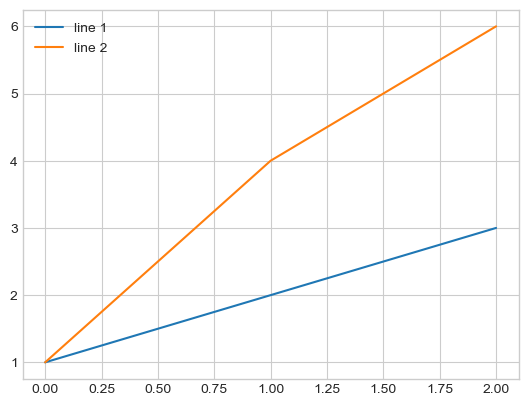

In [8]:
# line 객체를 가지고 legend()에서 직접 label값 입력 할 수 도 있다
fig,ax = fig,ax = plt.subplots()
line1, = ax.plot([1,2,3]) # line객체라고 생각하자
line2, = ax.plot([1,4,6])
ax.legend([line1,line2],['line 1','line 2'])

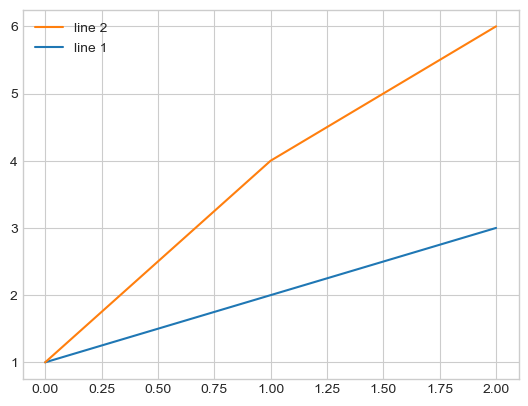

In [9]:
# 순서 변경도 가능
fig,ax = fig,ax = plt.subplots()
line1, = ax.plot([1,2,3]) # line객체라고 생각하자
line2, = ax.plot([1,4,6])
ax.legend([line2,line1],['line 2','line 1'])

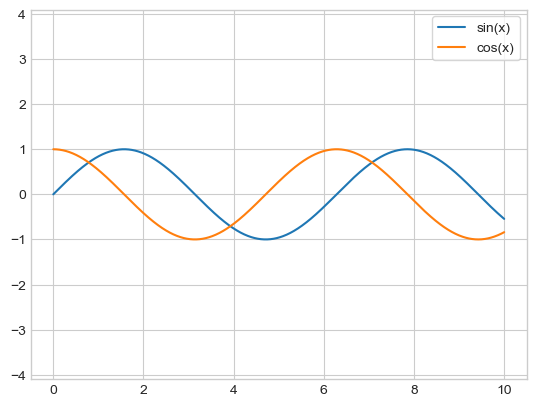

In [6]:
# legend frame생성
x = np.linspace(0,10,1000)
fig,ax = plt.subplots()
ax.plot(x,np.sin(x),label='sin(x)')
ax.plot(x,np.cos(x),label='cos(x)')
ax.axis('equal')
lg = ax.legend(frameon=True)

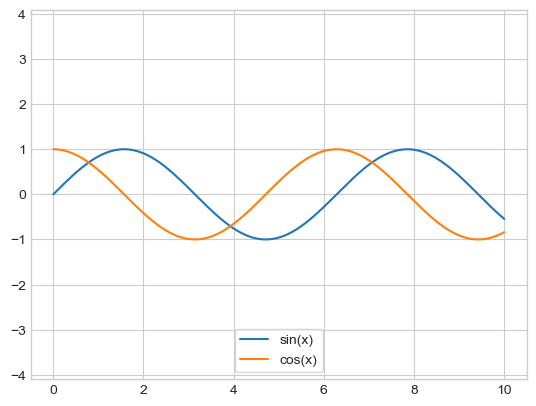

In [7]:
# 위치 default는 'best'이겟지
# supported => 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 
# 'center right', 'lower center', 'upper center', 'center'

x = np.linspace(0,10,1000)
fig,ax = plt.subplots()
ax.plot(x,np.sin(x),label='sin(x)')
ax.plot(x,np.cos(x),label='cos(x)')
ax.axis('equal')
lg = ax.legend(loc='lower center',frameon=True)

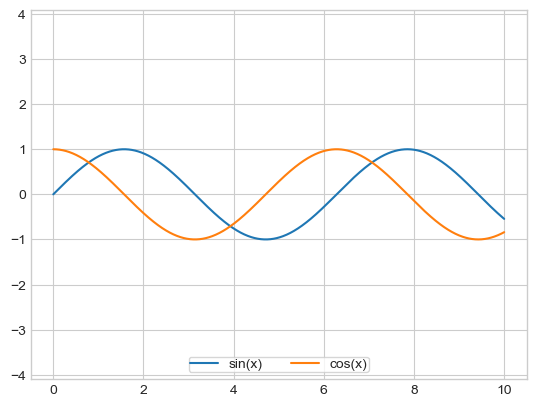

In [8]:
# 범례 형식, 프레임 두께

x = np.linspace(0,10,1000)
fig,ax = plt.subplots()
ax.plot(x,np.sin(x),label='sin(x)')
ax.plot(x,np.cos(x),label='cos(x)')
ax.axis('equal')
lg = ax.legend(loc='lower center',ncol=2,frameon=True,borderpad=0.1)

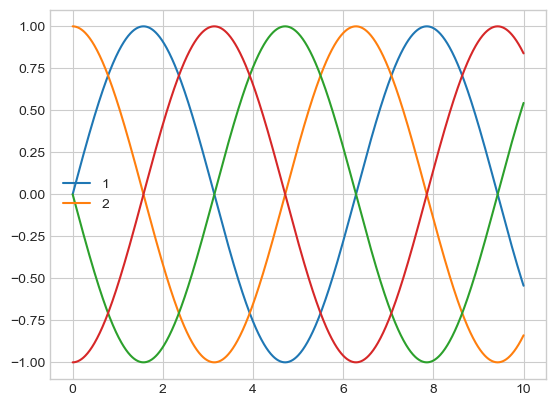

In [24]:
# 범례에 사용하기 싫은 애들도 있을수 있다

x = np.linspace(0,10,1000)
# (1000,1) + (4,) = (1000,4)
lines = plt.plot(x,(np.sin(x[:,np.newaxis] + np.pi*np.arange(0,2,0.5))))
plt.legend(lines[:2],['1','2'])


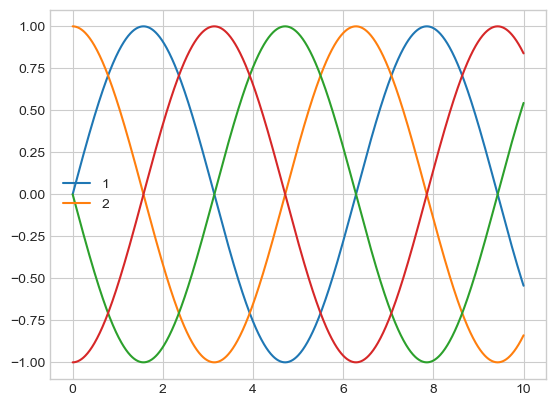

In [38]:
x = np.linspace(0,10,1000)
# (1000,1) + (4,) = (1000,4)
line1,line2,line3,line4 = plt.plot(x,(np.sin(x[:,np.newaxis] + np.pi*np.arange(0,2,0.5))))
plt.legend([line1,line2],['1','2'])

### 점 크기에 대한 범례
위에서 분명히 label은 line 혹은 point와 같이 그리는 얘들 속성이다 

근데 scatter plot에서 size는 따로 그리는게 아니었다

이럴때는 빈 객체를 그려버리자

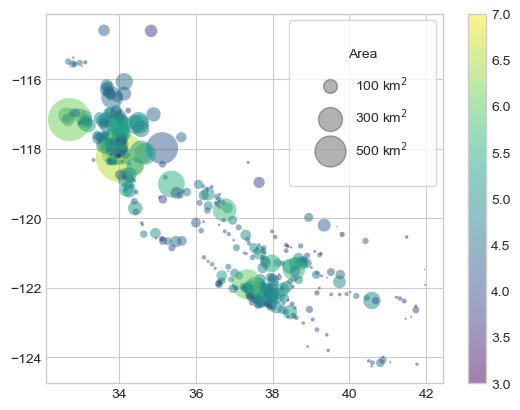

In [58]:
# 점 크기에 대한 범례
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')
lat,lon = cities['latd'], cities['longd']
population, area = cities['population_total'] , cities['area_total_km2']

#
plt.scatter(lat,lon,label=None,
            c = np.log10(population),cmap='viridis',
            s = area,linewidths=0,alpha=0.5)
plt.colorbar()
plt.clim(3,7) # color map lim

# 크기를 area로 잡았느데 이에대한 범례를 추가할거다
# 이전까지는 line즉 plot상의 객체로 그렸는데 area는 size만 결정할뿐 따로 하나의 객체가 아니다
# 이때는 빈 객체를 plot해버리자
# 여기서 size별 범례를 나타내고 싶기 때문에 역시 plt.scatter 써야한다

for area in [100,300,500]:
    plt.scatter([],[],c='k',s=area,label=f'{area} km$^2$',alpha=0.3) # 빈객체
lg = plt.legend(labelspacing=1,scatterpoints=1,frameon=True,borderpad=2)
lg.set_title('Area')

    

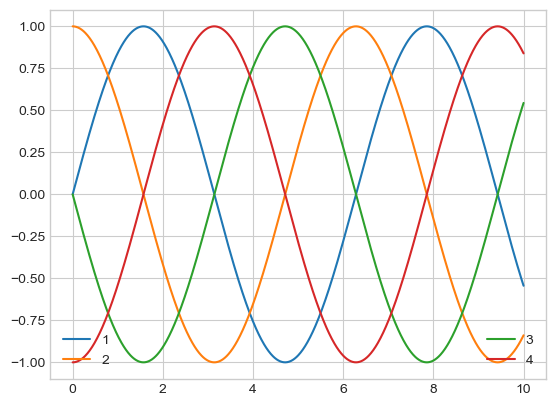

In [71]:
# 다중범례
# Legend() 인스턴스를 따로 만들어 
# add_artis() 로 추가해줘야함

from matplotlib.legend import Legend

x = np.linspace(0,10,1000)
# (1000,1) + (4,) = (1000,4)

fig,ax = plt.subplots()
line1,line2,line3,line4 = ax.plot(x,(np.sin(x[:,np.newaxis] + np.pi*np.arange(0,2,0.5))))
ax.legend([line1,line2],['1','2'],loc = 'lower left')
 
 
leg = Legend(ax,[line3,line4],['3','4'],loc='lower right')
ax.add_artist(leg)